<a href="https://colab.research.google.com/github/OlgaKantarzhy/data-and-python/blob/main/Correlation_and_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing the data relatively and visually
---

This worksheet introduces two new libraries:

**matplotlib**

A library of functions for plotting static, animated and interactive visualisations of data sets.  For ease, pandas use matplotlib for plotting a range of charts.

**scipy**

A library of functions for interpolating, optimising, linear regression, etc  

---

A dataset will be read into a dataframe, cleaned, wrangled and so prepared for summarising and the telling of stories through visualisations and summaries.

So far we have covered statistical measures over an individual series.  Linear regression reports correlation between the values in two series.

To get the results of a linear regression:  
*  import the `linregress` function from the `scipy.stats` package
*  run the `linregress` function with the two axes assigning the result to a variable (e.g. `regression`)

The result of the linregress function is a set of variables:  
*  `slope`, `intercept` - the gradient and y-intercept of the regression line (the line of best fit between the two series) are in `regression.slope` and `regression.intercept`
*  `rvalue` - the correlation coefficient - this indicates how closely the line drawn from the linear regression data fits the actual data, the closer to 1 the better the fit
*  `pvalue` - the probability of error if the regression line is extended to predict
*  the standard error is in `regression.stderr` and is the average distance of each data point from the lineof best fit


Further information [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)


### Exercise 1 - is age closely related to income?
---

Use linear regression to compare the columns 'Age' and 'Income' in the data set 'Income-Data' at this url:  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true  

To do this:
*  import the pandas library  


*  import the **linregress** function from the library **scipy.stats**  (`from scipy.stats import linregress`)  


*  open the Excel file at the url above, using the sheet_name '`county-level`', reading the data into a dataframe called **county_level_df**  


*  create a variable called **x** and assign the '`Age`' column of the `county_level_df` dataframe   


*  create a variable called **y** and assign the '`Income`' column of the `county_level_df` dataframe   


*  create a variable called **regression** and assign the result of running the linregress function with `x`, `y` as its parameters ( `linregress(x,y)` )   


*  display the regression  
(*Expected output:  LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189*)  


*  display the slope (`regression.slope`)  
(*Expected output: -0.31433084434233205 - this indicates that the line plotting Age against Income slopes downward implying that income reduces with age*)  


*  display the intercept (`regression.intercept`)  
(*Expected output: 72.78388856978748 - this indicates that income level starts at 72.78388856978748 and reduces from there by age*)    


*  display the rvalue (which indicates how closely income follows age and whether it goes up as age goes up or goes down as age goes up

In [78]:
import pandas as pd
from scipy.stats import linregress
url = "https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true"
county_level_df = pd.read_excel(url, sheet_name = "county-level")
county_level_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State       18 non-null     object
 1   County      18 non-null     int64 
 2   Population  18 non-null     int64 
 3   Age         18 non-null     int64 
 4   Income      18 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 848.0+ bytes


In [ ]:
x = county_level_df["Age"]
y = county_level_df["Income"]
regression = linregress(x,y)
regression

LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189, intercept_stderr=16.08233482195521)

In [ ]:
regression.slope

-0.31433084434233205

In [ ]:
regression.intercept

72.78388856978748

In [ ]:
regression.rvalue

-0.14787411576068246

### Exercise 2 - Could Population predict Income?  
---

Repeat the steps in exercise 1 to see if there is a clearer correlation between Population and Income.  

Add a statement in the text cell to describe your findings.

**Test output**:   
0.013558605755058871


In [ ]:
z = county_level_df["Population"]
regression2 = linregress(z,y)
regression2.rvalue

0.11644142628402862

The correlation coefficient (rvalue) for Population and Income equals to 0.116

### Exercise 3 - Does Stress predict Wellbeing?
---

Repeat the steps in Exercises 1 & 2 to see if you can find a statistically significant result.

Add a statement in the text cell to describe your findings

* Read the dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

* perform linear regression  
* look at r_squared and pvalue to get an idea of how predictive and significant these variables are

* save slope and intercepts in variables for later

Challenge:  
Write a function that checks the significance of a regression and displays a message indicating the result.

**Test output**:  
LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)  
r sqr = 0.4507725540176983  
model is significant, p < .05:  6.084540561441803e-07  

In [ ]:
df = pd.read_csv("https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true")
stress = df["Stress"]
wellbeing = df["Wellbeing"]
regression_s_w = linregress(stress,wellbeing)
regression_s_w

LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022, intercept_stderr=2.4636244230057622)

In [ ]:
print("R sqr equals to",regression_s_w.rvalue**2)

R sqr equals to 0.4507725540176983


In [ ]:
print("Pvalue equals to",regression_s_w.pvalue,"A p-value less than 0.05 is typically considered to be statistically significant")

Pvalue equals to 6.084540561441803e-07 A p-value less than 0.05 is typically considered to be statistically significant


In [ ]:
slope = regression_s_w.slope
intercepts = regression_s_w.intercept_stderr

In [ ]:
def check_pvalue(x,y):
  regression = linregress(x,y)
  if regression.pvalue < 0.5:
    print("Model is considered to be statistically significant")
  else:
    print("Model is not considered to be statistically significant")

check_pvalue(stress,wellbeing)

Model is considered to be statistically significant


# Visualising the data
---

There are a good number of libraries available containing functions for visualising data with bar charts, pie charts, line plots, box plots, scatter plots and, in some libraries, with more image based visualisations.

To keep it relatively simple, we will use matplotlib, a widely used library with a wide range of visualisation functions for data sets and mathematical equations.  It has the main functions we will use in this course:
*  bar charts
*  pie charts
*  line plots
*  box plots
*  scatter plots
*  histogram

Each requires these things:  
1. Select the data columns to be plotted
2. Prepare the data (remove null values, clean formats, etc)  
3. Run the function for the required plot

Once you have the hang of these, you can start to look at labelling, colouring, etc.

In order to begin creating visualisations, you need to:  
* import **matplotlib** as **plt**

Test output for Exercises 4 to 10 is in this [image](https://drive.google.com/file/d/1LYxLJyur_zgzvJcv_C1WGm21nf07ddY6/view?usp=sharing)

#  Bar charts and Line Plots
---

For these exercises, use the Excel data file:

'public-use-talent-migration' looking at sheet_name 'Country Migration'  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true

**Example**:  

Watch the video [here](https://drive.google.com/file/d/1eNOy7fhkB2CSfVdb66kqB66qXfoPfOpd/view?usp=sharing) - demonstration of creating a bar chart using the `matplotlib` library `pyplot`.  Then have a go at creating it yourself.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true"
country_migration_df = pd.read_excel(url, sheet_name = "Country Migration")
country_migration_df.head()

,base_country_code,base_country_name,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,af,Afghanistan,33.939110,67.709953,Low Income,South Asia,0.19,0.16,0.11,-0.05,-0.02
1,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,dz,Algeria,28.033886,1.659626,Upper Middle Income,Middle East & North Africa,0.19,0.25,0.57,0.55,0.78
2,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,ao,Angola,-11.202692,17.873887,Lower Middle Income,Sub-Saharan Africa,-0.01,0.04,0.11,-0.02,-0.06
3,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,ar,Argentina,-38.416097,-63.616672,High Income,Latin America & Caribbean,0.16,0.18,0.04,0.01,0.23
4,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,am,Armenia,40.069099,45.038189,Upper Middle Income,Europe & Central Asia,0.10,0.05,0.03,-0.01,0.02


### Exercise 4 - Line plot of net migration
---

Creating a line plot of mean net migration over the years 2015 to 2019

* create a new dataframe containing only the five columns holding net migration
* create a new data variable to hold the means of the five columns
* create a labels variable to hold the keys (column headings)
* use plt.plot(x, y) to plot your line chart

***Presentation tips:***   
Plot the chart, then add formatting, then show the plot   

Rotate the x-axis labels in the plot:  
`plt.xticks(rotation=45)`  

Show the grid:  
`plt.grid()`  

When all formatting has been done, show the plot:   
`plt.show()`

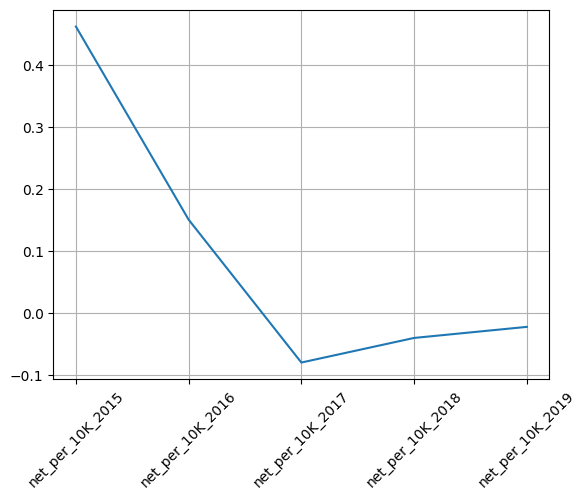

net_per_10K_2015    0.46
net_per_10K_2016    0.15
net_per_10K_2017   -0.08
net_per_10K_2018   -0.04
net_per_10K_2019   -0.02
dtype: float64


In [33]:
country_net_migration = country_migration_df[["net_per_10K_2015","net_per_10K_2016","net_per_10K_2017","net_per_10K_2018","net_per_10K_2019"]]
means = country_net_migration.mean()
labels = country_net_migration.keys()


plt.plot(labels, means)
plt.xticks(rotation=45)
plt.grid()
plt.show()

print(round(means,2))


### Exercise 5 - Creating a Bar chart for yearly migration
---
Create a bar chart which shows the total net migration for the years 2015-2019  

* split the migration columns into a new dataframe
* create a data variable from the max() of the five columns
* create a labels variable, this time just create a list of the 5 years ['2015','2016','2017','2018','2019']
* plot the bar chart

***Presentation tips***:
* use plt.xlabel('Year') and plt.ylabel('Total net migration') to name your axis
* display your bar graph with plt.show

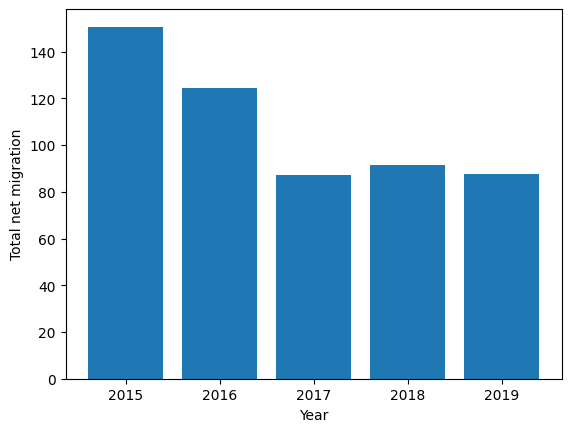

In [36]:
max = country_net_migration.max()
labels2 = ['2015','2016','2017','2018','2019']
plt.bar(labels2, max)
plt.xlabel('Year')
plt.ylabel('Total net migration')
plt.show()

### Exercise 6 - creating a bar graph using grouped data
---

Create a horizontal bar chart of 2019 mean immigration for each income level ('`target_country_wb_income`')

* create a data variable which contains the means, grouped by '`target_country_wb_income`'
* extract your labels (x) using the .keys() function
* use the plt.barh(x, y) to create a horizontal bar graph
* add labels to the axes ('Year', 'Net Migration')  
* show the plot  

Try using plt.bar(x,y) - can you see why horizontally is more appropriate?

<ipython-input-47-ccc08cbbfa55>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groups_income = country_migration_df.groupby(["target_country_wb_income"]).mean()


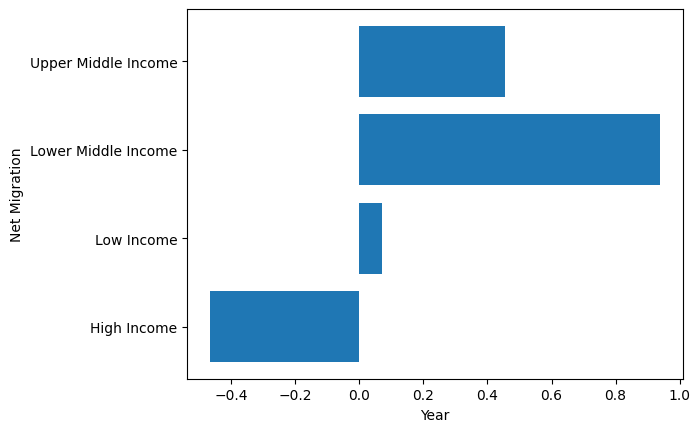

In [47]:
groups_income = country_migration_df.groupby(["target_country_wb_income"]).mean()
data = groups_income["net_per_10K_2019"]
labels = data.keys()
plt.barh(labels, data)
plt.xlabel('Year')
plt.ylabel('Net Migration')
plt.show()

# Pie Charts, Box Plots, Scatter Plots and Histograms
---

For these exercises you will use the Psychology dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

To get the data ready:

* read csv file above and save into a new variable called `psych_data`

In [49]:
url2 = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych_data = pd.read_csv(url2)
psych_data.head()

,Age,English,firstlanguage,sex,origin,Ukresidence,MAAS,Resilliance,Wellbeing,Stress,selfesteem,LoC,sleep,Year
0,24,Your Second Language,Arabic,Female,Outside Europe,0.0,4.60,44,26,19,22,10,32,2017
1,22,Your Second Language,Arabic,Female,Outside Europe,0.0,2.60,29,10,37,9,16,10,2017
2,26,Your Second Language,Burmese,Female,Outside Europe,0.0,4.13,26,20,20,18,20,24,2017
3,23,Your Second Language,Chinese,Male,Outside Europe,0.0,2.77,30,16,28,20,17,10,2017
4,25,Your Second Language,Chinese,Female,Outside Europe,0.0,3.80,33,27,15,18,12,17,2017


### Exercise 7 - Creating a pie chart of stress data
---
Create a pie chart which shows how stressed students who speak different languages are.   

To do this:

* similar to Exercise 6 - create a variable which groups the means of data by firstlanguage  
* store the means for 'Stress' in a variable called data
* extract your labels using the keys() function
* plot your pie chart using plt.pie(data, labels = labels)
* write a comment noting anything interesting about the visualisation




<ipython-input-65-7776f024a143>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groups = psych_data.groupby(["firstlanguage"]).mean()


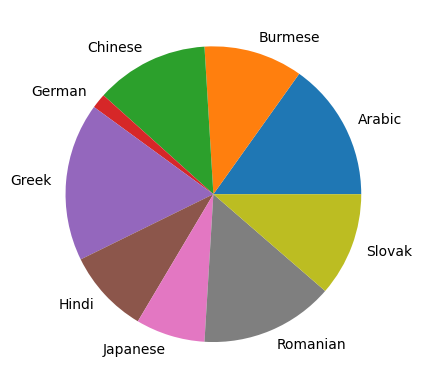

The diagram shows that speakers of Greek, Arabic and Romanic languages experience the biggest stress.


In [65]:
groups = psych_data.groupby(["firstlanguage"]).mean()
data = groups["Stress"]
labels = data.keys()
plt.pie(data, labels = labels)
plt.show()
print("The diagram shows that speakers of Greek, Arabic and Romanic languages experience the biggest stress.")

### Exercise 8 - Creating a box plot of Wellbeing
---
A box plot is used to visualise summary infomation about a data series such as the min, max and median.

Create a box plot of the Wellbeing scores

*  split off the wellbeing column  
*  use plt.boxplot(data, labels="Wellbeing") to create boxplot
*  show the boxplot

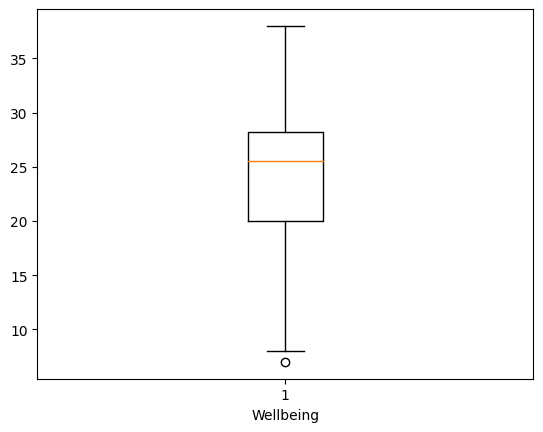

In [69]:
wellbeing = psych_data["Wellbeing"]
plt.boxplot(wellbeing)
plt.xlabel('Wellbeing')
plt.show()

### Exercise 9 - Histograms of  age
---

Create a histogram which shows the frequency distribution for '`Wellbeing`'.

* split the `Wellbeing` column off to provide the data
* plot the histogram using `plt.hist(data)`
* add labels using `plt.xlabel()` and `plt.ylabel()`
* change the colours of the bars - try plt.hist(x, color = 'red')
* show the plot


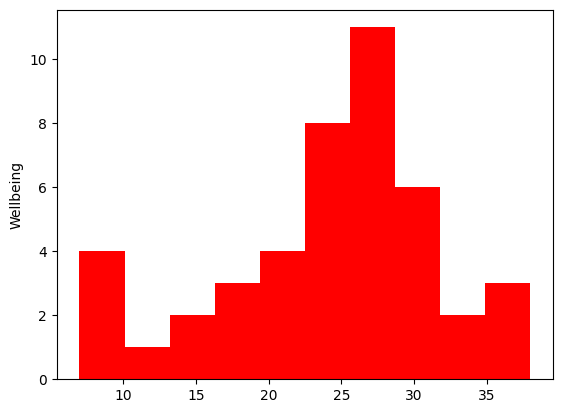

In [75]:
plt.hist(wellbeing, color = "red")
plt.ylabel("Wellbeing")
plt.show()

### Exercise 10 - Create a scatterplot of Wellbeing and Stress with line of best fit
---

Earlier in exercise 3, we found that Stress significantly predicted Wellbeing.

Create a scatterplot of Wellbeing and Stress data.

* create **x** from the `Stress` column
* create *y* from the `Wellbeing` column
* use `plt.scatter(x,y)` to create a scatterplot
* add x axis and y axis labels using `plt.xlabel('Stress')` and `plt.ylabel('Wellbeing')`
*  

Adding a line of best fit:   

* create a regression variable and assign the result of using linregress
* store the slope and intercept (`slope = regression.slope`, `intercept = regression.intercept`)
* plt.plot(x, slope*x + intercept)

Show the plots.

Write a short data story ( a description of the data.  What conclusion could be reached from the chart?  How confident could you be in this conclusion and why?




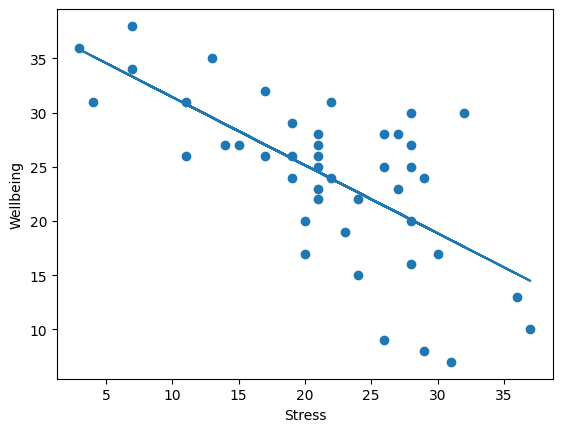

In [79]:
x = psych_data["Stress"]
y = psych_data["Wellbeing"]
plt.scatter(x,y)
plt.xlabel('Stress')
plt.ylabel('Wellbeing')
regression = linregress(x,y)
slope = regression.slope
intercept = regression.intercept
plt.plot(x, slope*x + intercept)
plt.show()

## Data story
---

Add your data story here

Stress can have a significant impact on a person's overall well-being, and understanding how stress predicts well-being is a crucial aspect of mental and physical health research.
This analisys shows that stress can have detrimental effects on a person's well-being.
Studying the correlation between stress and well-being is of paramount importance for several reasons: it enables the development of preventive strategies to reduce the risk of stress-related illnesses, research in this area can inform policymakers and organizations on how to create environments and policies that support well-being and reduce stressors, thereby enhancing the overall quality of life for populations.

# Further reference on w3schools

[Matplotlib on w3schools](https://www.w3schools.com/python/matplotlib_intro.**asp**)